In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
data = pd.read_csv('data.csv')

In [147]:
data

,Region,EC votes,2016 Estimate,2010 Census,Rural population,Urban population
0,Alabama,9,4863300,4779736,1957932,2821804
1,Alaska,3,741894,710231,241338,468893
2,Arizona,11,6931071,6392017,651358,5740659
3,Arkansas,6,2988248,2915918,1278329,1637589
4,California,55,39250017,37253956,1880350,35373606
5,Colorado,9,5540545,5029196,696435,4332761
6,Connecticut,7,3576452,3574097,429155,3144942
7,Delaware,3,952065,897934,149985,747949
8,District of Columbia,3,681170,601723,0,601723
9,Florida,29,20612439,18801310,1661466,17139844


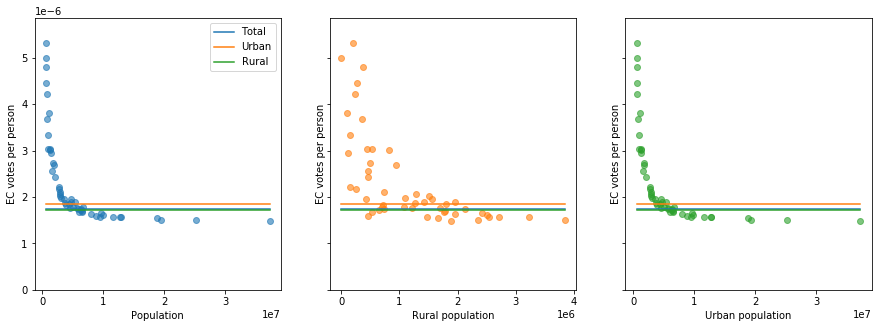

In [154]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
ax0, ax1, ax2 = axes

avg = data['EC votes'].sum() / data['2010 Census'].sum()
rural = np.dot(data['Rural population'], data['EC votes'] / data['2010 Census']) / data['Rural population'].sum()
urban = np.dot(data['Urban population'], data['EC votes'] / data['2010 Census']) / data['Urban population'].sum()

y = data['EC votes'] / data['2010 Census']
keys = ['2010 Census', 'Rural population', '2010 Census']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
xlabels = ['Population', 'Rural population', 'Urban population']
for ax, key, c, xlabel in zip(axes, keys, colors, xlabels):
    x = data[key]
    ax.scatter(x, y, c=c, alpha=.6)
    ax.plot([x.min(), x.max()], [avg, avg], c='#1f77b4', label='Total')
    ax.plot([x.min(), x.max()], [rural, rural], c='#ff7f0e', label='Urban')
    ax.plot([x.min(), x.max()], [urban, urban], c='#2ca02c', label='Rural')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('EC votes per person')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

    ax.set_ylim(0, 1.1 * y1.max())
ax0.legend(loc='best')

plt.draw()

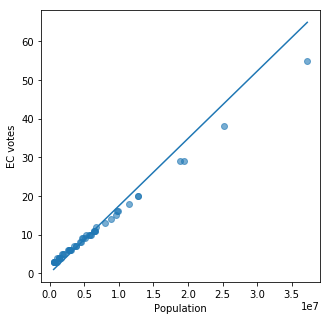

In [158]:
f, ax = plt.subplots(1, figsize=(5, 5))
x = data['2010 Census']
idxs = np.argsort(x)
x = x[idxs]
y = data['EC votes']
y = y[idxs]
ax.scatter(x, y, c='#1f77b4', alpha=.6)
ax.plot([x.min(), x.max()], [x.min() * avg, x.max() * avg], c='#1f77b4')
ax.set_xlabel('Population')
ax.set_ylabel('EC votes')
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.show()